In [69]:

import os
import time
import tushare as ts
import pandas as pd
import numpy as np



class GetDatafromTushare():

    def __init__(self):
        self.pro = ts.pro_api("d94b8d1af9f3110dca7acf2e85b4bf10b7d33de74491de8f671c4b8b")

    def get_all_stocks(self):
        """
        得到所有股票的行情
        :return:
        """
        data = self.pro.stock_basic(exchange='', list_status='L', fields='ts_code,symbol,name,area,industry,list_date')
        # 选出上市时间在2019-03-31之前的股票
        stocks_data = data[data.list_date<'20190331']
        # stocks_data = stocks_data.loc[0:200]   # 这句只是为了测试，后面需要删掉
        return stocks_data

    def get_market_trading_days(self,startdate,enddate):
        """
        取交易所交易的日期
        :param startdate: 开始日期
        :param enddate: 结束日期
        :return:
        """
        tradedate_df = self.pro.trade_cal(exchange='', start_date=startdate, end_date=enddate, is_open=1)
        trading_days = tradedate_df.cal_date.tolist()
        return trading_days
    def get_all_daily(self):
        all_daily = self.pro.daily()
        return all_daily
    

In [70]:
obj = GetDatafromTushare()
data = obj.get_all_daily()
data

,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount
0,689009.SH,20201207,68.00,72.20,63.89,71.30,67.06,4.24,6.3227,103178.70,702914.507
1,000061.SZ,20201207,6.98,7.14,6.91,7.11,6.98,0.13,1.8625,156688.49,110904.146
2,000060.SZ,20201207,4.80,4.82,4.64,4.68,4.80,-0.12,-2.5000,595102.99,279430.468
3,000059.SZ,20201207,5.72,5.73,5.57,5.59,5.72,-0.13,-2.2727,129937.11,73099.914
4,000058.SZ,20201207,7.08,7.09,6.98,7.00,7.07,-0.07,-0.9901,37639.00,26473.577
...,...,...,...,...,...,...,...,...,...,...,...
4995,601011.SH,20201204,3.88,3.88,3.78,3.81,3.88,-0.07,-1.8041,164718.52,62793.280
4996,300190.SZ,20201204,8.60,8.73,8.47,8.67,8.71,-0.04,-0.4592,127719.69,110140.016
4997,300196.SZ,20201204,14.96,15.24,14.73,15.02,14.94,0.08,0.5355,26678.65,40001.850
4998,300187.SZ,20201204,7.08,7.46,7.00,7.27,7.06,0.21,2.9745,133693.38,96805.910


In [71]:
data.iloc[0:10,0:6]

,ts_code,trade_date,open,high,low,close
0,689009.SH,20201207,68.00,72.20,63.89,71.30
1,000061.SZ,20201207,6.98,7.14,6.91,7.11
2,000060.SZ,20201207,4.80,4.82,4.64,4.68
3,000059.SZ,20201207,5.72,5.73,5.57,5.59
4,000058.SZ,20201207,7.08,7.09,6.98,7.00
5,000056.SZ,20201207,3.38,3.42,3.34,3.40
6,000055.SZ,20201207,4.71,4.72,4.66,4.67
7,000050.SZ,20201207,15.84,15.93,15.45,15.50
8,000049.SZ,20201207,51.95,52.59,51.68,52.15
9,000048.SZ,20201207,24.02,24.93,23.87,24.11


In [77]:

def get_stock_bar():
    df = ts.pro_bar(ts_code='000001.SZ', adj='qfq', start_date='20201101', end_date='20201207')
    return df
data = get_stock_bar()
data.iloc[0:10,0:6]

,ts_code,trade_date,open,high,low,close
0,000001.SZ,20201207,19.31,19.39,18.68,18.91
1,000001.SZ,20201204,19.47,19.47,18.97,19.30
2,000001.SZ,20201203,19.78,19.86,19.17,19.54
3,000001.SZ,20201202,19.93,20.06,19.52,19.63
4,000001.SZ,20201201,19.70,20.51,19.40,20.05
5,000001.SZ,20201130,19.90,20.88,19.59,19.74
6,000001.SZ,20201127,20.00,20.00,19.38,19.70
7,000001.SZ,20201126,19.05,19.61,19.03,19.50
8,000001.SZ,20201125,19.48,19.70,19.05,19.06
9,000001.SZ,20201124,19.62,19.68,19.17,19.36


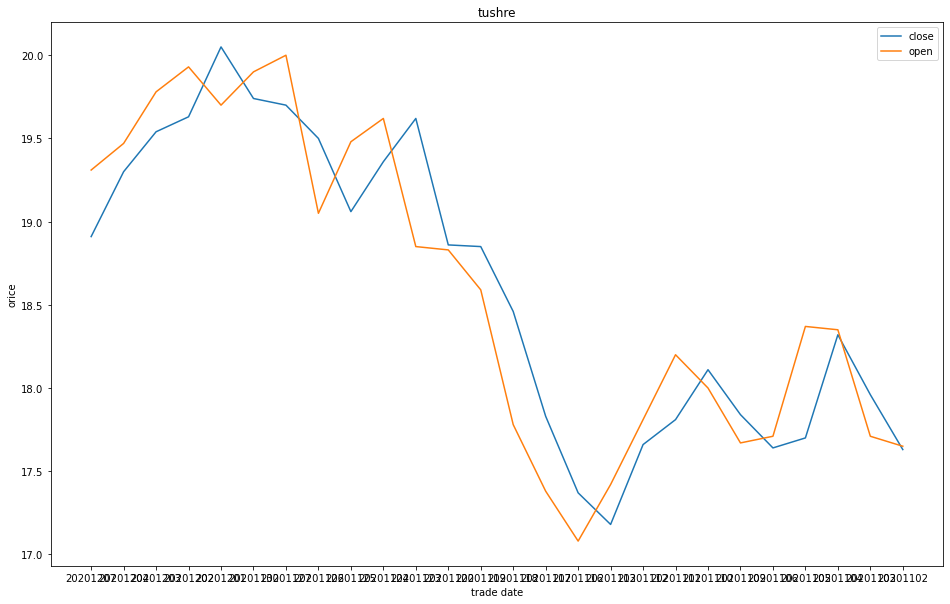

In [86]:

import matplotlib.pyplot as plt

plt.figure(1, figsize=(16, 10))
fig.suptitle('test title', fontsize=20)
plt.title('tushre')
plt.xlabel('trade date')
plt.ylabel('orice')
plt.plot(data['trade_date'], data['close'], label='close')
plt.plot(data['trade_date'], data['open'], label='open')
plt.legend()
plt.show()



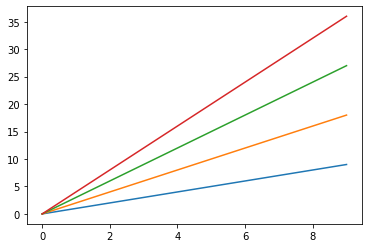